## Import data

In [30]:
import pandas as pd

data = pd.read_csv('data/train.csv')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [32]:
data.isna().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

## Setup

In [42]:
from pycaret.classification import *

In [43]:
data_train = data.drop(columns=['RescuerID', 'Name', 'PetID', 'Description', 'VideoAmt', 'PhotoAmt', 'State', 'Breed1', 
                                'Breed2', 'Quantity'], axis=1)

In [44]:
cat_cols = ['Type',
            'Gender', 
            'Color1', 
            'Color2', 
            'Color3', 
            'MaturitySize', 
            'FurLength', 
            'Vaccinated', 
            'Dewormed', 
            'Sterilized', 
            'Health']

In [46]:
model = setup(data=data_train, target='AdoptionSpeed', session_id=40, categorical_features=cat_cols, train_size=0.3)

,Description,Value
0,session_id,40
1,Target,AdoptionSpeed
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(14993, 14)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


## Training models

In [47]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.3642,0.6235,0.2854,0.3373,0.3323,0.1442,0.1494,1.9770
ada,Ada Boost Classifier,0.3569,0.6015,0.2774,0.3281,0.3179,0.1318,0.1381,0.2320
lightgbm,Light Gradient Boosting Machine,0.3480,0.6095,0.2752,0.3296,0.3341,0.1289,0.1301,0.7050
xgboost,Extreme Gradient Boosting,0.3476,0.6050,0.2796,0.3330,0.3363,0.1298,0.1307,2.6720
ridge,Ridge Classifier,0.3460,0.0000,0.2668,0.3195,0.3059,0.1149,0.1215,0.0260
catboost,CatBoost Classifier,0.3456,0.6106,0.2747,0.3297,0.3353,0.1275,0.1282,7.8680
lr,Logistic Regression,0.3449,0.6043,0.2679,0.3236,0.3138,0.1161,0.1211,1.8300
lda,Linear Discriminant Analysis,0.3447,0.6061,0.2710,0.3255,0.3153,0.1175,0.1222,0.0570
rf,Random Forest Classifier,0.3293,0.5905,0.2641,0.3187,0.3224,0.1081,0.1085,0.6540
knn,K Neighbors Classifier,0.3029,0.5653,0.2455,0.3015,0.3002,0.0760,0.0764,0.1550


In [48]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=40, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Tune Model

In [49]:
tuned_best_model = tune_model(best_model, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3778,0.6382,0.2765,0.2072,0.2675,0.1436,0.1697
1,0.3511,0.6227,0.2570,0.1931,0.2491,0.1073,0.1261
2,0.3600,0.6350,0.2635,0.1976,0.2550,0.1191,0.1407
3,0.3511,0.6196,0.2570,0.1937,0.2492,0.1068,0.1265
4,0.3533,0.6096,0.2585,0.1942,0.2502,0.1098,0.1301
5,0.3711,0.6312,0.2731,0.4268,0.2656,0.1359,0.1604
6,0.3467,0.6116,0.2547,0.1943,0.2472,0.1022,0.1225
7,0.3808,0.6501,0.2792,0.2109,0.2704,0.1484,0.1766
8,0.3786,0.6386,0.2776,0.2078,0.2680,0.1454,0.1721
9,0.3808,0.6254,0.2793,0.2085,0.2694,0.1485,0.1753


In [50]:
print(tuned_best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0009655371384897234, loss='deviance',
                           max_depth=6, max_features=0.9978861187437932,
                           max_leaf_nodes=None,
                           min_impurity_decrease=6.927120447854026e-05,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=6, min_weight_fraction_leaf=0.0,
                           n_estimators=231, n_iter_no_change=None,
                           presort='deprecated', random_state=40,
                           subsample=0.4360865234231492, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Finalize model

In [51]:
best_model_final = finalize_model(tuned_best_model)

## Analyze Model

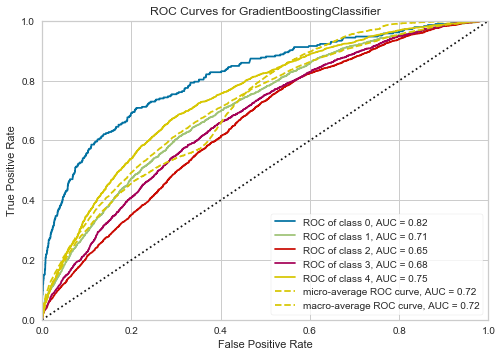

In [53]:
plot_model(best_model_final, plot = 'auc', scale = 1)

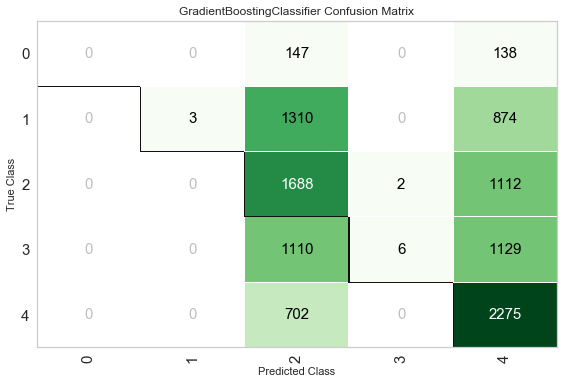

In [54]:
plot_model(best_model_final, plot = 'confusion_matrix')

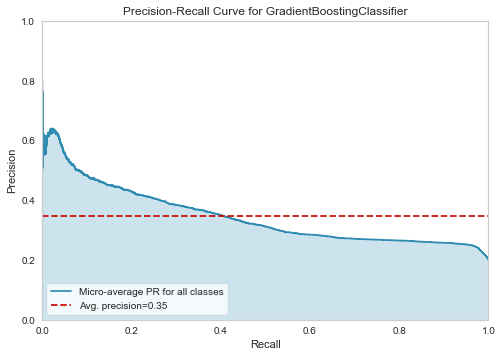

In [55]:
plot_model(best_model_final, plot = 'pr')

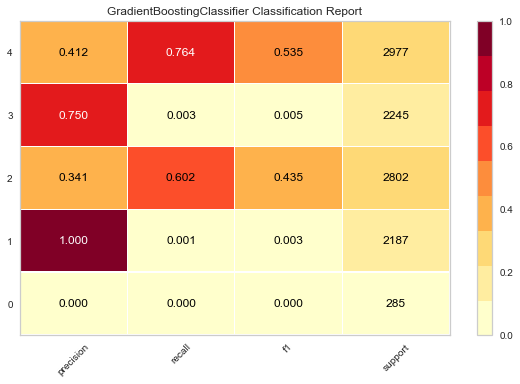

In [56]:
plot_model(best_model_final, plot = 'class_report')

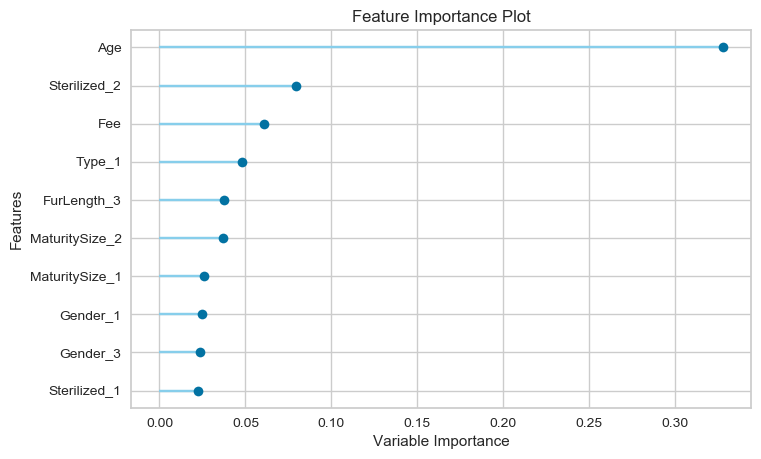

In [57]:
plot_model(best_model_final, plot = 'feature')

## Predict Test Data

In [61]:
test = pd.read_csv('data/test.csv')

In [62]:
test_data = test.drop(columns=['RescuerID', 'Name', 'Description', 'VideoAmt', 'PhotoAmt', 'State', 'Breed1', 
                                'Breed2', 'Quantity'], axis=1)

In [63]:
test_data.head()

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,PetID
0,2,8,1,2,6,7,1,1,1,1,2,1,0,e2dfc2935
1,2,36,2,1,4,7,2,3,1,1,1,2,0,f153b465f
2,2,2,1,6,7,0,2,2,1,1,2,1,200,3c90f3f54
3,1,12,2,2,5,0,2,2,1,1,1,1,0,e02abc8a3
4,2,12,1,2,3,7,2,2,1,1,1,1,0,09f0df7d1


In [25]:
submission = predict_model(best_model_final, data = test_data)[['PetID', 'Label']]

In [64]:
submission.rename(columns = {'Label':'AdoptionSpeed'}, inplace = True)

In [65]:
submission.to_csv("submission.csv", index=False, header=True)
submission.head(10)

,PetID,AdoptionSpeed
0,e2dfc2935,2
1,f153b465f,4
2,3c90f3f54,2
3,e02abc8a3,4
4,09f0df7d1,4
5,0487529d4,2
6,bae7c4b1c,4
7,548bcf206,1
8,0f82cea1e,4
9,a3787f15e,4
